# 2.Feature selection -With correlation-Pearson
In this step we will  be removing the features which are highly correlated

If an Independent feature is highly corelated with dependent feature  we need not remove those kind of feature

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset


data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)#data.data which is all my independent features values and show the independent features name by the data.features_names
df['target'] = data.target #dependent feature (specify any name that you actually)

print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [3]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Like we have independent features 'AveRooms',
 'AveBedrms','AveOccup' that are corelated more then 80 % then from these three I am use 1 ,this way we remove feature .Beacuse of duplicate feature  we don.t take all take 1 only

In [4]:
X = df.drop('target', axis=1) # Feature matrix
y = df['target']# output  feature

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [8]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


the output are all the co relation for the independent feature

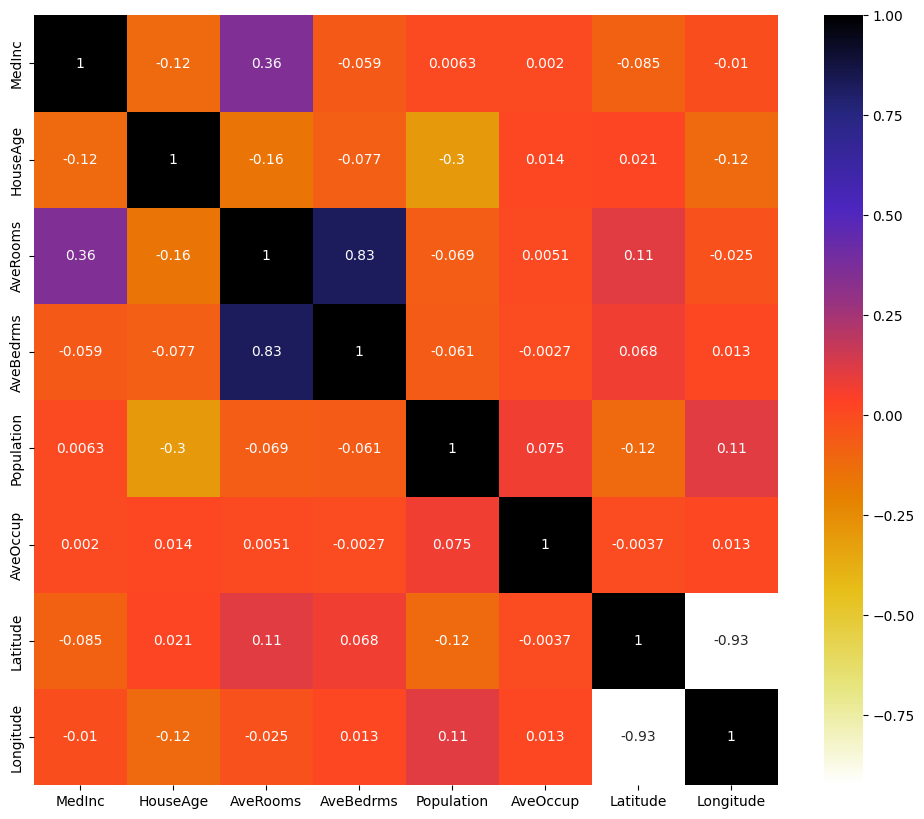

In [9]:
import seaborn as sns
#using Pearson Correlation - It lies between -1 to +1
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

corr: This represents the data that will be visualized in the heatmap. Typically, this would be a correlation matrix or a similar 2D dataset where each cell value is represented by a specific color.

annot=True: This parameter is set to True to display the numerical value of each cell within the heatmap, making it easier to interpret the exact data values alongside the color representation.

cmap=plt.cm.CMap r: This specifies the colormap to use for the heatmap.
plt.cm: This refers to Matplotlib's colormap module.

In [20]:
#with the following function we can select higly corelated feature that features which is corealted each other 70 to 80 percent then we remove one feature (by the threshold value we get the percentage )
# it will remove the first feature that is co related  with anything other feature

def Correlation(dataset,threshold):
  col_corr=set()#set  of all the namesof correlated columnnsk
  corr_matrix=dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>threshold: #we are interested in absolute coeff value
        colname=corr_matrix.columns[i] # getting the name of column
        col_corr.add(colname)
  return col_corr

  # for the best understanding about this shell code "https://chatgpt.com/share/687b9f87-0908-8006-9ae9-4dc3200ef322"


In [21]:
Corr_features=Correlation(X_train,0.7) # only for X_train not X_test for handling overfitting we do it for X_train ,if I find out four features are highly corelated over here then  remove those features from X train and also X_test
len(set(Corr_features))# for better understanding "https://chatgpt.com/share/687b9f87-0908-8006-9ae9-4dc3200ef322"

2

In [22]:
Corr_features

{'AveBedrms', 'Longitude'}

In [24]:
#drop that features from X_train and X_test also
X_train.drop(Corr_features,axis=1)
X_test.drop(Corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79
...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56


In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivadityabaghel05/santandercsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/santandercsv


In [31]:
df=pd.read_csv('/root/.cache/kagglehub/datasets/shivadityabaghel05/santandercsv/versions/1/santander.csv',nrows=10000)

In [33]:
X=df.drop(labels=['TARGET'],axis=1)#independent features
y=df['TARGET']#dependent features
#we need to do this because varience threshold applied only on the independent features

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((7000, 370), (3000, 370))

# Let's Apply Correlation

<Axes: >

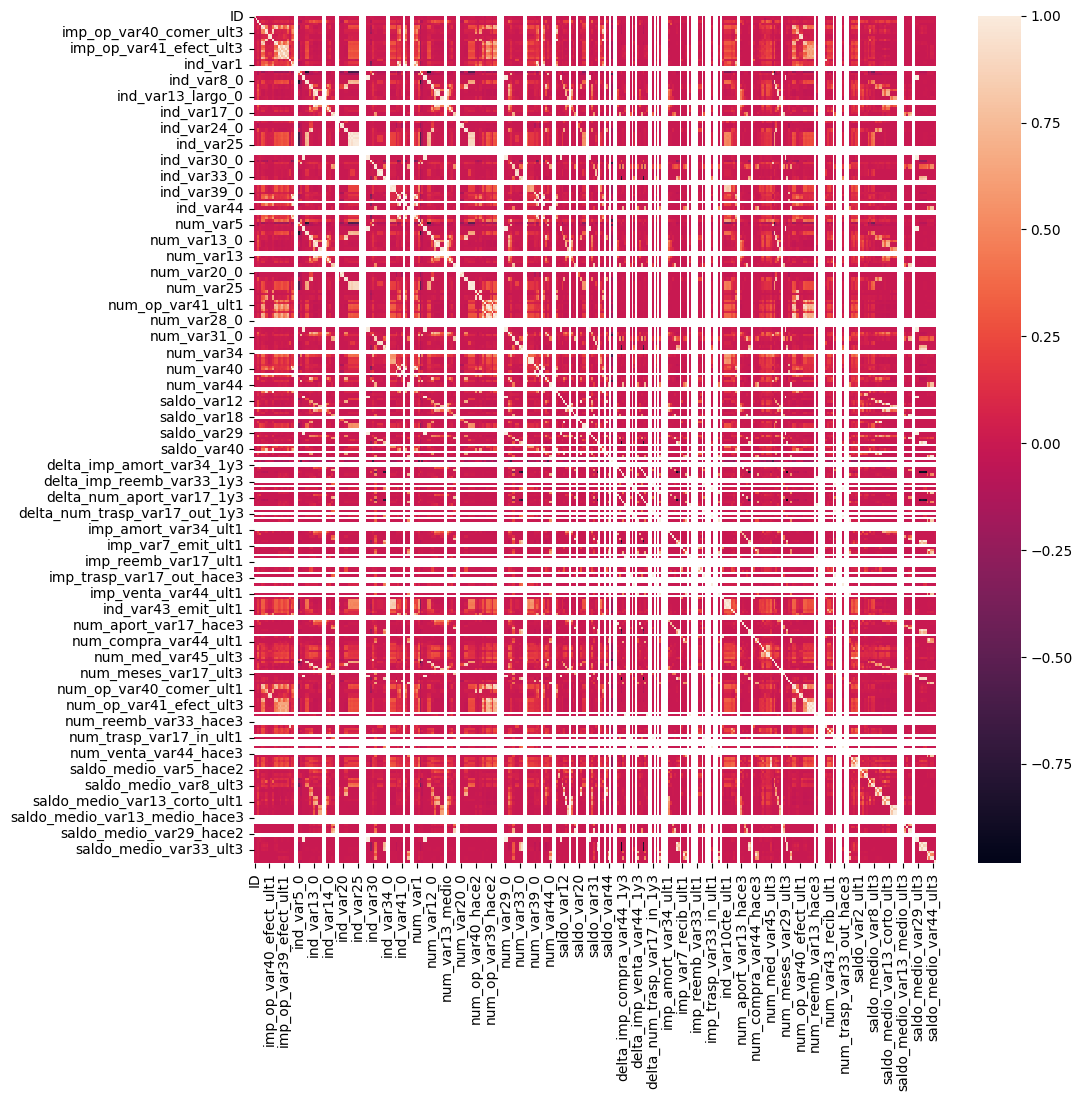

In [39]:
import seaborn as sns
#using pearson Correlation
cormat=X_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(cormat)
#plt.figure(figsize=(20,20))
#sns.heatmap(cormat, annot=True, cmap='coolwarm')
#plt.show()

In [45]:
corr_features=Correlation(X_train,0.9) # only for X_train not X_test for handling overfitting we do it for X_train ,if I find out four features are highly corelated over here then  remove those features from X train and also X_test
len(set(corr_features))#show how much column are highly corelated,0.9 means 90% corelated

156

In [44]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [47]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [48]:
X_test.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
9394,18882,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,75170.310000
898,1778,2,79,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,57855.510000
2398,4806,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
5906,11854,2,48,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,50659.230000
2343,4697,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,43843.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,8026,2,28,0.0,237.45,237.45,0.0,0.0,0,237.45,...,0,0,0,0,0.0,0.0,0.0,0,0.0,103622.310000
7375,14795,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,51898.800000
9307,18726,2,25,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,99251.790000
8394,16923,2,50,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
